<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [30]:
await piplite.install(['numpy'])

In [33]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [31]:
import numpy as np

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<AxesSubplot:ylabel='MEDV'>

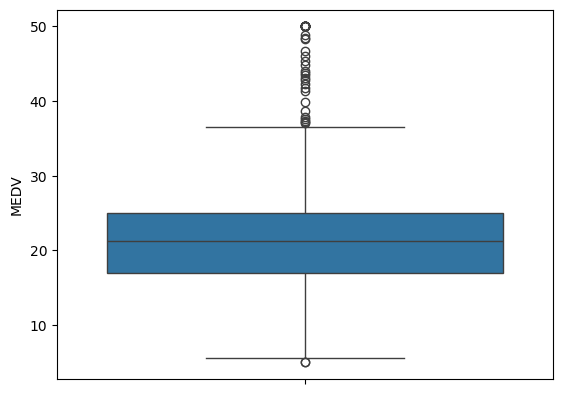

In [16]:
sns.boxplot(y='MEDV',data=boston_df)

<AxesSubplot:ylabel='CHAS'>

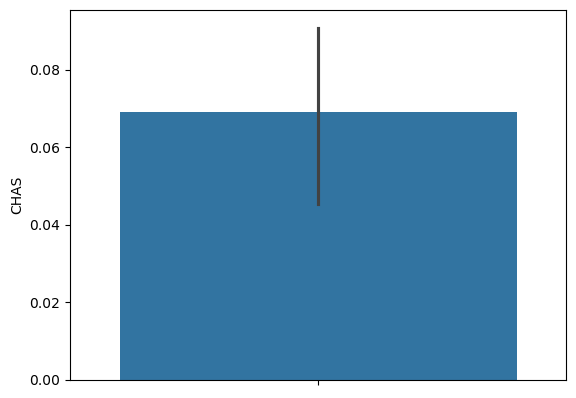

In [15]:
sns.barplot(y='CHAS',data=boston_df)

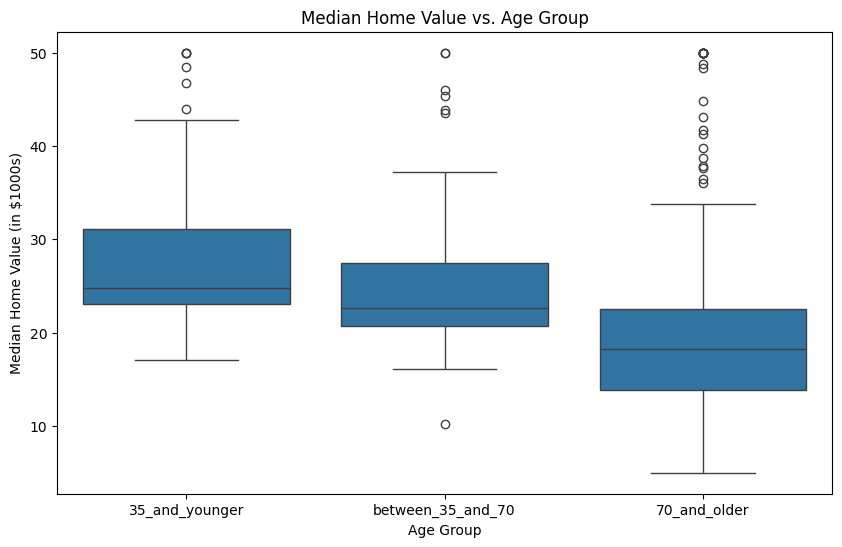

In [34]:
boston_df['age_group'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, np.inf],
    labels=['35_and_younger', 'between_35_and_70', '70_and_older'],
    right=True,
    include_lowest=True
)

# Step 2: Create the boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='MEDV', data=boston_df)

# Step 3: Customize and display the plot
plt.title('Median Home Value vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Home Value (in $1000s)')
plt.show()

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

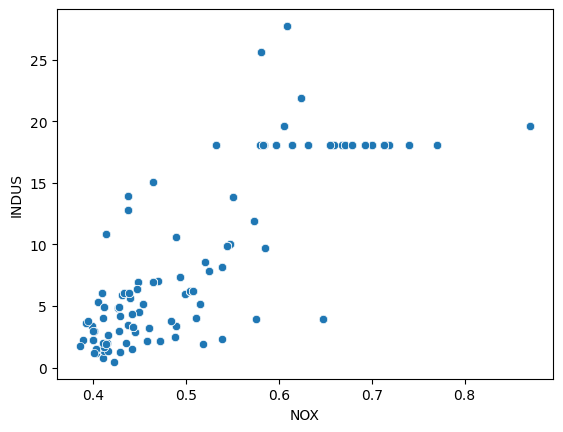

In [38]:
sns.scatterplot(x='NOX' , y='INDUS', data=boston_df)

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

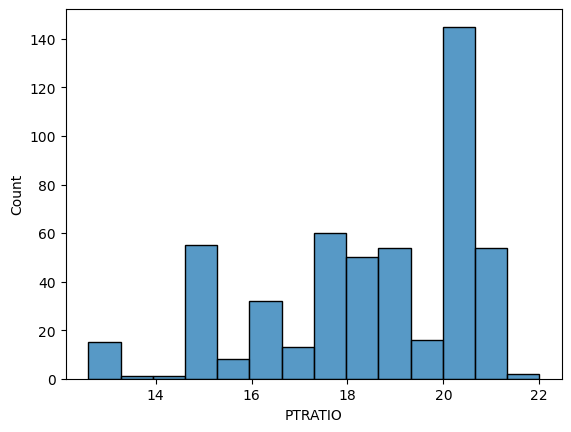

In [39]:
sns.histplot(x='PTRATIO' ,data=boston_df)

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [45]:
%pip install scipy

In [46]:
import scipy as sc

H_0 : µ_1 = µ_2 theres no significant difference in median value of houses bounded by the Charles river
H_1 : µ_1 ≠ µ_2 theres a significant difference in median value of houses bounded by the Charles river

In [ ]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')

# since the p-value is greater than 0.05 we can assume equality of variance

In [50]:
sc.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
               boston_df[boston_df['CHAS']==1]['MEDV'],equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [61]:
boston_df['age_group']

0      between_35_and_70
1           70_and_older
2      between_35_and_70
3      between_35_and_70
4      between_35_and_70
             ...        
501    between_35_and_70
502         70_and_older
503         70_and_older
504         70_and_older
505         70_and_older
Name: age_group, Length: 506, dtype: category
Categories (3, object): ['35_and_younger' < 'between_35_and_70' < '70_and_older']

### P-value is greater than 0.05 , we fail to reject the null hypothesis

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### H_0 : µ_1 = µ_2 = µ_3 difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
### H_1 : µ_1 ≠ µ_2 or µ_2 ≠ µ_3 or µ_1 ≠ µ_3 theres a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [63]:
thirty_lower_medv = boston_df[boston_df['age_group'] == '35_and_younger']['MEDV']
between_35_and_70_medv = boston_df[boston_df['age_group'] == 'between_35_and_70']['MEDV']
seventy_older_medv = boston_df[boston_df['age_group'] == '70_and_older']['MEDV']

In [64]:
f_statistic, p_value = scipy.stats.f_oneway(thirty_lower_medv, between_35_and_70_medv, seventy_older_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


### we reject the null hypothesis and so theres a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [67]:
correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

In [68]:
correlation_coefficient, p_value

(0.7636514469209192, 7.913361061210442e-98)

### A Pearson correlation coefficient of 0.76 indicates a strong positive linear relationship between the two variable , therefore we conclude that there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town 

## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [69]:
model = sm.OLS(boston_df['DIS'], boston_df['MEDV']).fit()

# 4. Print the regression summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    DIS   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Mon, 25 Aug 2025   Prob (F-statistic):                   1.52e-146
Time:                        16:26:01   Log-Likelihood:                         -1127.4
No. Observations:                 506   AIC:                                      2257.
Df Residuals:                     505   BIC:                                      2261.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### R-squared (uncentered) = 0.732 , correlation coefficient is 0.85 , therefore there is a strong positive correlation , and Coefficient (coef) for MEDV: The value is 0.1526. This means that for every additional $1,000 in a home's median value, its weighted distance to employment centers is predicted to increase by 0.1526 units.